# 🚀 Welcome to the Boosting and Stacking Practice Session!  📊✨



In this practice, we’ll dive into XGBoost, AdaBoost, and Stacking — three powerful techniques in ensemble learning used to boost model performance and robustness. You'll gain hands-on experience with each method by applying them to a real-world dataset and analyzing their impact on classification accuracy.




## **Introduction:**
- **Time Limit:** You have 60 minutes to complete the practice.
- **Objective:** Implement XGBoost, AdaBoost, and a simple stacking ensemble to classify data. You’ll preprocess the dataset, train each model, fine-tune hyperparameters, and evaluate their performances. Document your approach, hyperparameters, and any insights you gather along the way.
- **Presentation:** After completing the exercise, present your findings. Discuss each model’s accuracy, any differences in performance, and the benefits and challenges of each approach.
- **Ask for Help:** If you need assistance at any point, feel free to ask the instructor for guidance or clarification.

## **Why This Matters:**

Boosting algorithms like XGBoost and AdaBoost are widely used in machine learning due to their ability to create strong models from weak learners. Stacking adds another layer of prediction by combining multiple models, helping to leverage the strengths of each. Mastering these techniques will equip you with essential tools for improving accuracy in complex tasks and enhance your understanding of ensemble methods.



## **Recap** 📑

### XGBoost:
XGBoost, short for eXtreme Gradient Boosting, is a powerful implementation of gradient boosting machines. It's known for its speed, performance, and versatility. Key features of XGBoost include:

- **Optimized Performance**: XGBoost is optimized for both speed and performance, making it one of the most efficient implementations of gradient boosting.
  
- **Regularization**: It incorporates regularization techniques to prevent overfitting and improve generalization.
  
- **Flexibility**: XGBoost supports various objective functions and evaluation metrics, making it suitable for a wide range of tasks.

### AdaBoost:

AdaBoost, or Adaptive Boosting, combines multiple weak learners to create a strong overall model. It’s called "adaptive" because it adjusts the weights of each instance, assigning higher weights to those that were misclassified in previous rounds. While sensitive to noise, AdaBoost is effective for binary classification and can handle some multiclass problems, especially when the data is fairly clean.

More details about the implementation check the following link:

 https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

### Stacking:
Stacking, also known as stacked generalization, is an ensemble learning technique that combines the predictions of multiple base models to improve overall performance. Key aspects of stacking include:

- **Model Combination**: Stacking combines predictions from diverse base models using a meta-learner to generate a final prediction.
  
- **Diversity**: Stacking leverages the diversity of base models to capture different aspects of the data and improve overall robustness.
  
- **Performance Boost**: By leveraging the strengths of multiple models, stacking often leads to performance improvements over individual models.

In this notebook, we'll delve deeper into these concepts, exploring advanced techniques and practical implementations of XGBoost and stacking. Let's dive in and uncover the potential of these powerful ensemble learning methods!





Get ready to boost your model’s power and dive into the world of ensemble learning!

Happy coding! 💻🚀


### Dataset Overview

The dataset we'll be working with contains information about customers of a telecommunications company and whether they churned or not. Here's a brief overview of the dataset:

- **CustomerID**: Unique identifier for each customer.
- **Gender**: Gender of the customer (e.g., Male, Female).
- **SeniorCitizen**: Indicates if the customer is a senior citizen (1) or not (0).
- **Partner**: Whether the customer has a partner or not (Yes, No).
- **Dependents**: Whether the customer has dependents or not (Yes, No).
- **Tenure**: Number of months the customer has been with the company.
- **PhoneService**: Whether the customer has a phone service or not (Yes, No).
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service).
- **InternetService**: Type of internet service subscribed by the customer (DSL, Fiber optic, No).
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service).
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service).
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service).
- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service).
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service).
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service).
- **Contract**: Type of contract the customer has (Month-to-month, One year, Two year).
- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No).
- **PaymentMethod**: Payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- **MonthlyCharges**: Monthly charges incurred by the customer.
- **TotalCharges**: Total charges incurred by the customer.
- **Churn**: Whether the customer churned or not (Yes, No).

### Data Exploration

Before we proceed with modeling, let's explore the dataset to understand its structure and gain insights into the distribution of key variables. We'll check for any missing values and visualize the distribution of the target variable (Churn) to understand the imbalance in the dataset.


1. First step we will load the necessairy libraries to use for this practice :



In [106]:
# Cell 1: Import necessary libraries
# Import pandas for data manipulation
# Import train_test_split from sklearn.model_selection for splitting the dataset
# Import xgboost and other necessary modules for modeling

# Import pandas for data manipulation
import pandas as pd

# Import train_test_split from sklearn.model_selection for splitting the dataset
from sklearn.model_selection import train_test_split

# Import XGBoost classifier and other necessary modules for modeling
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Import other necessary modules for evaluation and preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris


2. Load the dataset



In [107]:
# use pandas to load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


3. Display some rows of your dataset

In [108]:
#display some rows to see the name of each column of your dataset

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

4. Data exploration

In [109]:
# Use pandas functions to explore the dataset (e.g., df.info(), df.describe())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [112]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [113]:
# Check for missing values and handle them if necessary
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<ipython-input-119-542f6320f8e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


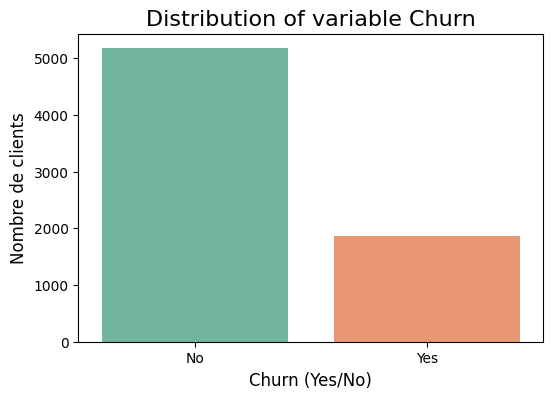

In [119]:
# Visualize the distribution of target variable 'Churn' (e.g., using seaborn's countplot)
plt.figure(figsize=(6,4))  # Taille de la figure
sns.countplot(x='Churn', data=df, palette='Set2')

#Label
plt.title('Distribution of variable Churn', fontsize=16)
plt.xlabel('Churn (Yes/No)', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)

plt.show()

5. Data preprocessing

In [122]:
# Perform necessary data preprocessing steps such as encoding categorical variables and scaling numerical features Hint: the previous practice (Decision Trees)
# Loop through each column in the dataframe
# Initialize the label encoder

# Perform necessary data preprocessing steps such as encoding categorical variables and scaling numerical features
# Loop through each column in the dataframe
# Initialize the label encoder

# Initialiser le LabelEncoder
label_encoder = LabelEncoder()

# Boucle pour encoder toutes les colonnes catégorielles
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Afficher les premières lignes du dataset après encodage
print("\nAperçu du dataset après encodage des variables catégorielles :")
print(df.head())

# Mise à l'échelle des caractéristiques numériques
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Replace spaces with NaN in numerical columns
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN

# Impute NaN values (e.g., with the mean)
# !pip install sklearn.impute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])


# Initialiser le StandardScaler
from sklearn.preprocessing import StandardScaler # Make sure StandardScaler is imported
scaler = StandardScaler()

# Appliquer la mise à l'échelle des variables numériques
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Afficher les premières lignes du dataset après mise à l'échelle
print("\nAperçu du dataset après mise à l'échelle des caractéristiques numériques :")
print(df.head())



Aperçu du dataset après encodage des variables catégorielles :
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0           

In [136]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Churn', axis=1)  # Toutes les colonnes sauf 'Churn'
y = df['Churn']  # La colonne cible (Churn)

In [124]:
# Split the data into training and testing sets using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 6. **AdaBoost**

- Create AdaBoost classifier with the following parameters : max_depth = 3, learning_rate = 0.1, n_estimators = 100

In [134]:
# Initialize an AdaBoost classifier (e.g., xgb.XGBClassifier)


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# --- Créer un arbre de décision de base ---
# base_model = DecisionTreeClassifier(max_depth=3, random_state=42) #This is not needed anymore

# Créer un modèle AdaBoost avec un arbre de décision comme base
ada_model = AdaBoostClassifier(
    #base_estimator=DecisionTreeClassifier(max_depth=3),  # Arbre de décision avec profondeur 3, removed
    estimator=DecisionTreeClassifier(max_depth=3), #updated to estimator, to provide base model
    learning_rate=0.1,  # Taux d'apprentissage
    n_estimators=100  # Nombre d'arbres
)


In [140]:
# Train the XGBoost model on the training data (e.g., using .fit() method)

from xgboost import XGBClassifier
# Diviser les données en un jeu d'entraînement et un jeu de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #This is not needed anymore, already done in previous cells

# Initialiser le classifieur XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Remove the 'customerID' column from the training and testing data
X_train = X_train.drop(columns=['customerID'])
X_test = X_test.drop(columns=['customerID'])

# Entraîner le modèle XGBoost sur les données d'entraînement
xgb_model.fit(X_train, y_train)

# Effectuer des prédictions sur les données de test
y_pred = xgb_model.predict(X_test)

# Évaluer la précision du modèle XGBoost
accuracy = accuracy_score(y_test, y_pred)

# Afficher la précision
print(f"XGBoost Model Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:10:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 78.21%


In [142]:
# Evaluate the model's performance on the testing data using appropriate metrics (e.g., accuracy_score, classification_report)
# Import necessary modules
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import confusion_matrix

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)

# Afficher la précision
print(f"XGBoost Model Accuracy: {accuracy * 100:.2f}%")

# Afficher le rapport de classification (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred)) # Now confusion_matrix is defined and can be used


XGBoost Model Accuracy: 78.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.61      0.50      0.55       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Confusion Matrix:
[[916 120]
 [187 186]]


## Understanding Hyperparameter Tuning

The code below may look complex at first glance, but it's aimed at helping us find the best combination of hyperparameters for our AdaBoost model.

### What are Hyperparameters?

Hyperparameters are settings that control the learning process of our machine learning model. They are not learned from the data, unlike model parameters, but rather set before the learning process begins.

### Why Tuning Hyperparameters?

Tuning hyperparameters is crucial for achieving optimal performance and preventing overfitting or underfitting of our model. By testing different combinations of hyperparameters, we can find the settings that result in the best performance on our dataset.

### The Code Breakdown:

- **max_depth, learning_rate, n_estimators:** These are all different hyperparameters that we're going to test. Each parameter controls a different aspect of the AdaBoost model's behavior.
  
- **Nested Loops:** The nested loops iterate through each combination of hyperparameter values. For example, the outer loop may iterate over max_depth values, while the inner loop may iterate over learning_rate values.

- **Model Training and Evaluation:** Inside the loops, we initialize an AdaBoost model with the current hyperparameter values, train it on the training data, and evaluate its performance on the testing data using an accuracy score.

- **Recording Results:** We keep track of the accuracy scores for each combination of hyperparameters. This allows us to compare the performance of different settings and identify the combination that yields the best results.

By understanding and running this code, we can identify the hyperparameter settings that optimize our model's performance and achieve better predictive accuracy.


To Do:

- Test the following values for max_depth : 3/5/7
- Test the following values for learning rate : 0.1/0.01/0.001
- Test the following values for number of estimators: 100/200/300
- Make nested loop to test all combinations of these values.

In [145]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Définir les valeurs possibles pour chaque hyperparamètre
max_depth_best = best_hyperparameters[0]  # Exemple : 3
learning_rate_best = best_hyperparameters[1]  # Exemple : 0.1
n_estimators_best = best_hyperparameters[2]  # Exemple : 100

# Initialiser un arbre de décision comme classifieur de base
base_estimator = DecisionTreeClassifier(max_depth=max_depth_best)

# Initialiser le classifieur AdaBoost avec les meilleurs paramètres
# Changed 'base_estimator' to 'estimator'
ada_best = AdaBoostClassifier(
    estimator=base_estimator,  # Utilisation de l'arbre de décision comme estimateur de base
    learning_rate=learning_rate_best,  # Taux d'apprentissage
    n_estimators=n_estimators_best     # Nombre d'arbres
)

# Entraîner le modèle sur les données d'entraînement
ada_best.fit(X_train, y_train)

# Effectuer des prédictions sur les données de test
y_pred = ada_best.predict(X_test)

# Évaluer la performance du modèle AdaBoost sur les données de test avec le score de précision
accuracy_ada_best = accuracy_score(y_test, y_pred)

# Afficher la précision du modèle AdaBoost avec les meilleurs hyperparamètres
print(f"AdaBoost Model Accuracy with Best Hyperparameters: {accuracy_ada_best * 100:.2f}%")


AdaBoost Model Accuracy with Best Hyperparameters: 80.98%


In [146]:
# Cell 7: Model training with best hyperparameters - AdaBoost
# Train the AdaBoost model on the training data using the best hyperparameters
ada_best = AdaBoostClassifier(
    learning_rate=learning_rate_best,  # Learning rate for the AdaBoost algorithm
    n_estimators=n_estimators_best     # Number of trees (estimators)
)


# Train the AdaBoost model on the training data
ada_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada_best.predict(X_test)

# Evaluate the performance of the AdaBoost model on the test data using accuracy score
accuracy_ada_best = accuracy_score(y_test, y_pred)

# Print the accuracy of the AdaBoost model with the best hyperparameters
print(f"AdaBoost Model Accuracy with Best Hyperparameters: {accuracy_ada_best * 100:.2f}%")


AdaBoost Model Accuracy with Best Hyperparameters: 78.92%


7. XGBoost

Implement XGBoost classifier with the best hyperparameters values of AdaBoost and make a comparaison between them.


In [147]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialiser un modèle XGBoost avec les meilleurs hyperparamètres
xgb_model = xgb.XGBClassifier(
    max_depth=3,                 # Profondeur maximale des arbres
    learning_rate=0.1,           # Taux d'apprentissage
    n_estimators=100,            # Nombre d'arbres
    objective='binary:logistic', # Problème de classification binaire
    eval_metric='logloss'        # Fonction d'évaluation
)

# Entraîner le modèle XGBoost sur les données d'entraînement
xgb_model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_xgb = xgb_model.predict(X_test)

# Évaluer la performance du modèle XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Afficher la précision du modèle XGBoost
print(f"XGBoost Model Accuracy: {accuracy_xgb * 100:.2f}%")


XGBoost Model Accuracy: 81.19%


### 8. Stacking

In [163]:
# Model training - Stacking
# Create a set of diverse base models (e.g., logistic regression, random forest, SVM)
# Import necessary libraries
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split

base_models = [
 ('logistic_regression', LogisticRegression(max_iter=1000)),  # Logistic Regression
    ('random_forest', RandomForestClassifier(n_estimators=100)),  # Random Forest
    ('svm', SVC(kernel='linear'))  # Support Vector Machine
]

# Define the meta-model (XGBoost)
meta_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss') # Add use_label_encoder=False




In [164]:
# Initialize a stacking classifier with the base models and a meta-learner (e.g., another XGBoost model)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
